In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1Cs92FI55-7BEpK2V8LZ5DwyvjoGdtVJj'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1Cs92FI55-7BEpK2V8LZ5DwyvjoGdtVJj


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NYT.csv')  

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Using TensorFlow backend.


In [0]:
df = pd.read_csv('NYT.csv',header=None)

In [7]:
df.head()

,0,1,2,3,4,5
0,USW00014732,"LA GUARDIA AIRPORT, NY US",7/1/2017,79,85,74
1,USW00014732,"LA GUARDIA AIRPORT, NY US",7/2/2017,80,91,73
2,USW00014732,"LA GUARDIA AIRPORT, NY US",7/3/2017,83,90,73
3,USW00014732,"LA GUARDIA AIRPORT, NY US",7/4/2017,78,87,70
4,USW00014732,"LA GUARDIA AIRPORT, NY US",7/5/2017,77,85,70


In [0]:
TMIN = np.array([df.iloc[:,3]])
TMAX = np.array([df.iloc[:,4]])
TAVG = np.array([df.iloc[:,5]])

In [9]:
print(TAVG)

[[74 73 73 70 70 69 68 71 70 72 75 78 73 65 67 71 75 76 78 77 77 73 72 64
  62 65 67 71 68 66 70 72 69 70 71 70 66 66 65 68 71 72 65 72 71 69 71 70
  73 75 71 75 74 74 69 66 64 64 64 61 61 66 56 56 59 64 71 61 61 61 58 59
  59 63 67 70 70 69 69 68 69 71 72 68 70 71 71 68 70 61 57 55 52 56 59 58
  66 70 66 71 71 69 62 56 53 62 66 48 45 52 58 62 58 58 61 67 59 52 51 54
  61 47 48 47 58 53 48 52 48 41 40 42 27 26 34 42 39 38 45 41 36 40 37 43
  37 34 37 42 42 42 37 44 40 43 40 42 40 50 41 40 36 31 32 35 32 22 24 23
  25 33 34 46 36 34 36 38 36 28 24 18 12 12 18 10  8 14 17 20 10  8  6 18
  30 26 35 37 20 15 16 24 23 20 26 37 42 36 36 28 24 28 35 42 34 26 19 33
  18 17 31 28 28 30 26 28 38 42 34 27 36 47 37 30 33 33 47 50 37 36 43 40
  44 40 42 43 36 38 35 35 34 34 34 31 33 34 33 34 32 34 32 29 30 34 31 32
  33 37 37 35 34 35 39 46 43 40 43 32 39 41 35 37 38 33 33 40 38 46 59 45
  39 40 40 39 40 38 41 46 45 46 50 53 49 51 48 44 50 65 70 68 61 54 56 54
  54 56 60 53 52 52 60 55 55 56 50 55 

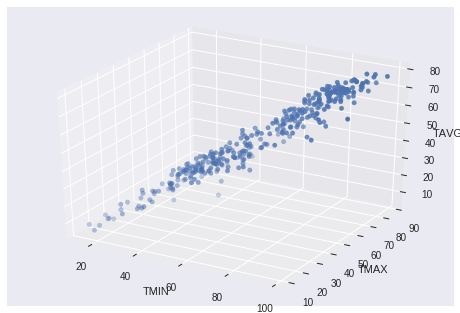

In [10]:
fig = plt.figure(1)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(TMAX,TMIN,TAVG,marker= 'o')
ax.set_xlabel('TMIN')
ax.set_ylabel('TMAX')
ax.set_zlabel('TAVG')
plt.show()

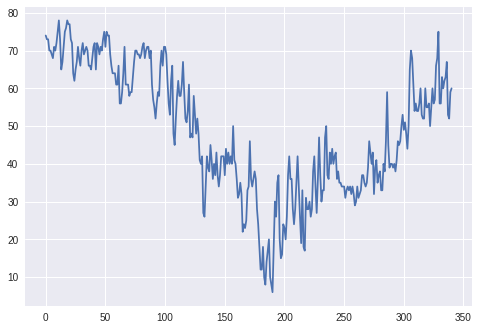

In [11]:
plt.plot(TAVG[0,:])
plt.show()

In [0]:
X = np.concatenate([TMIN,TMAX],axis=0)
X = np.transpose(X)
y = np.transpose(TAVG)

In [0]:
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)

In [0]:
sc1= MinMaxScaler()
sc1.fit(y)
y=sc1.transform(y)

In [0]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
model = Sequential([
LSTM(20,activation='tanh',input_shape=(1,2),recurrent_activation='hard_sigmoid'),
Dense(1),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss="mean_squared_error",optimizer='adam',metrics=["mean_absolute_error"])
# Fitting the Model
model.fit(X,y,epochs=15,batch_size= 1,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1840      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
341/341 [==============================] - 1s 3ms/step - loss: 0.0528 - mean_absolute_error: 0.1595
Epoch 2/15
341/341 [==============================] - 1s 2ms/step - loss: 0.0060 - mean_absolute_error: 0.0625
Epoch 3/15
341/341 [==============================] - 1s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0435
Epoch 4/15
341/341 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0375
Epoch 5/15
341/341 [==============================] - 1s 2ms/step - loss: 0.0024 - mean_abso

In [18]:
predictions=model.predict(X_test,verbose=1)
print(predictions[:5])

103/103 [==============================] - 0s 870us/step
[[0.55263156]
 [0.70238024]
 [0.7498791 ]
 [0.8067605 ]
 [0.54292524]]


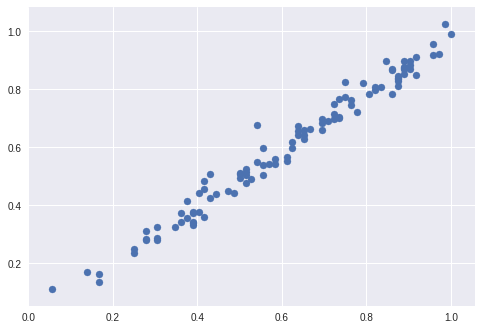

In [19]:
plt.figure(2)
plt.scatter(y_test,predictions)
plt.show(block=False)

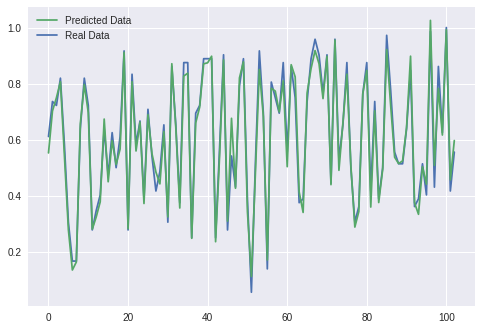

In [20]:
plt.figure(3)
Test, = plt.plot(y_test)
Predict, = plt.plot(predictions)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()